<a href="https://colab.research.google.com/github/Mwangi-dan/Sentiment-analysis_Group-project/blob/main/Twitter_sentiment_analysis_Group6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# path to dataset should be "drive/sentiment-analysis/"
path = "/content/drive/MyDrive/sentiment-analysis/Twitter_Sentiments.csv"

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import seaborn as sns

# Load the dataset

In [7]:
df = pd.read_csv(path)
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [9]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [10]:
df.isnull().sum()

,0
id,0
label,0
tweet,0


# Preprocessing Dataset

In [11]:
# Removing patterns in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [12]:
# Removing user handles in tweets
df['clean_tweets'] = np.vectorize(remove_pattern)(df['tweet'], '@[\w]*')

In [13]:
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [14]:
df.tail()

,id,label,tweet,clean_tweets
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."
31961,31962,0,thank you @user for you follow,thank you for you follow


In [15]:
# Removing special chars, punctuations & numbers
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#]", " ", regex=True)
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [16]:
# Removing short words from the tweets
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [17]:
# Tokenizing words
tokenized_tweet = df['clean_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

,clean_tweets
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, cause, they, offer, wh..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time]"
4,"[factsguide, society, #motivation]"


In [18]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda tokenized_sentence: [stemmer.stem(word) for word in tokenized_sentence])
tokenized_tweet.head()

,clean_tweets
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, caus, they, offer, whee..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time]"
4,"[factsguid, societi, #motiv]"


In [19]:
# combine words to a sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweets'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis (EDA)

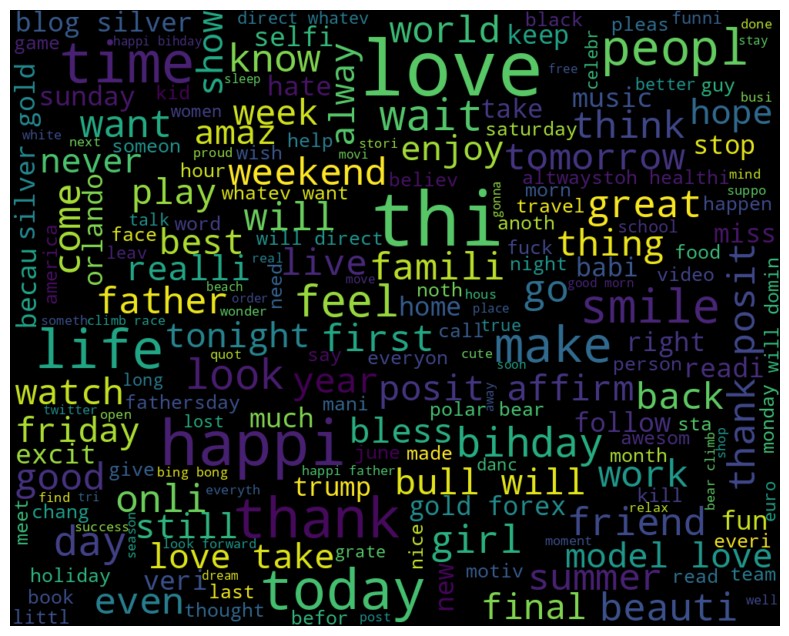

In [20]:
# Visualize frequent words
all_words = " ".join([sentence for sentence in df['clean_tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=800, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

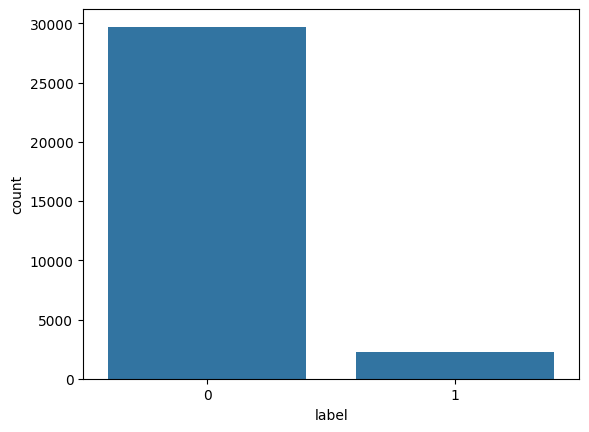

In [21]:
sns.countplot(x=df['label'])
plt.show()

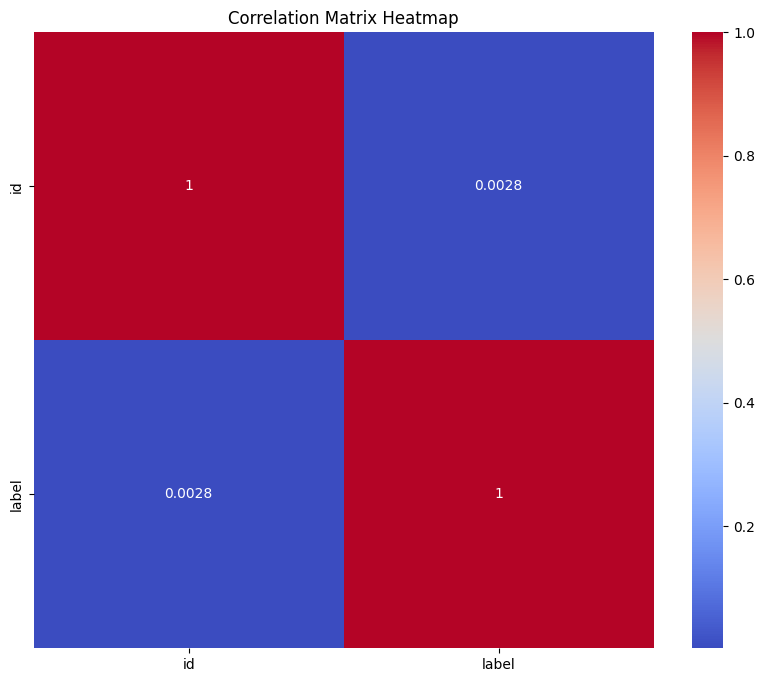

In [24]:
# Calculate the correlation matrix only for numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Added annot=True for better visualization
plt.title('Correlation Matrix Heatmap')
plt.show()

###Extracting data from Hashtags

In [27]:
# Functiopn to extract hashtags
def extract_hashtag(tweets):
  """
  Tweets (str): words in the tweets

  Returns:
  hashtag (string): hashtags extracted from tweet
  """
  hashtags = []
  for t in tweets:
    hashtag = re.findall("#(\w+)", t)
    hashtags.append(hashtag)
  return hashtags

In [28]:
# Extract hashtags from +ve tweets (label = 0)
pos_tweets = extract_hashtag(df['clean_tweets'][df['label']==0])

# Extract hashtags from -ve tweets (label = 1)
neg_tweets = extract_hashtag(df['clean_tweets'][df['label']==1])

In [29]:
pos_tweets[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [30]:
neg_tweets[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [31]:
# unnesting the lists
pos_tweets = sum(pos_tweets, [])
neg_tweets = sum(neg_tweets, [])

In [32]:
pos_tweets[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [33]:
import nltk

freq = nltk.FreqDist(pos_tweets)
d = pd.DataFrame(
    {
        'Hashtag': list(freq.keys()),
        'Count': list(freq.values())
    }
)
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


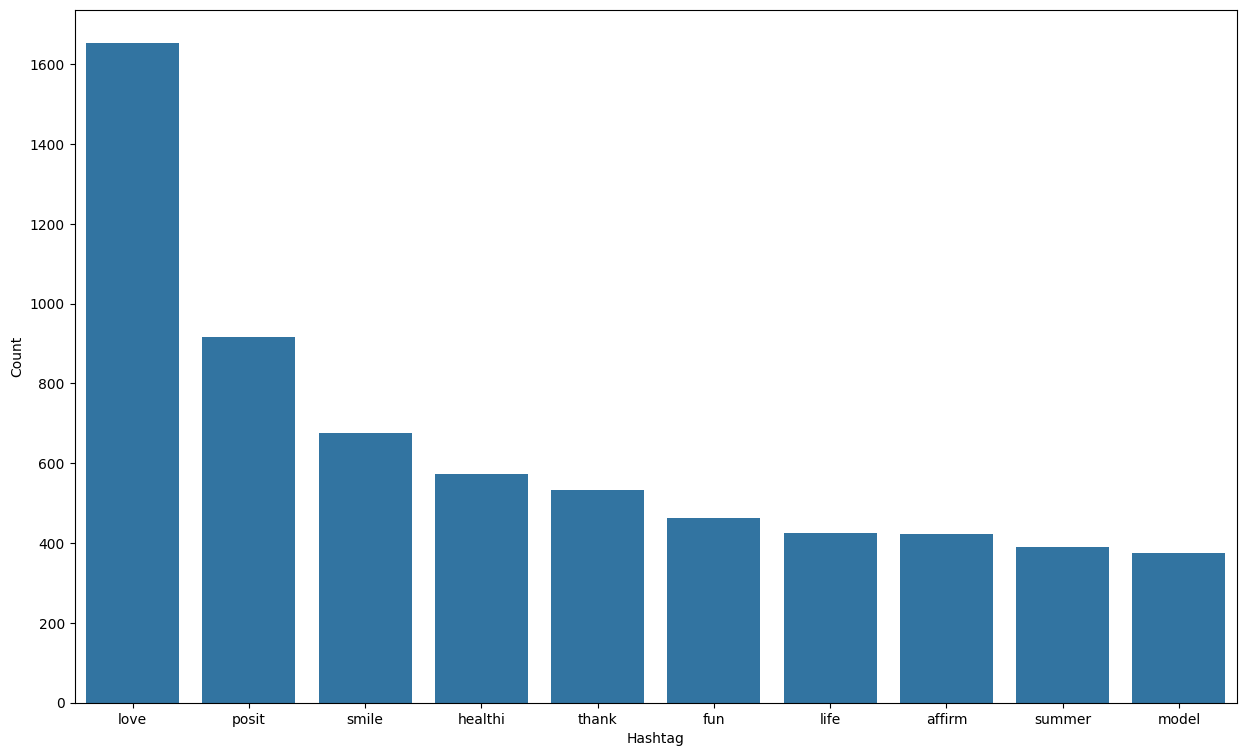

In [34]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y="Count")
plt.show()

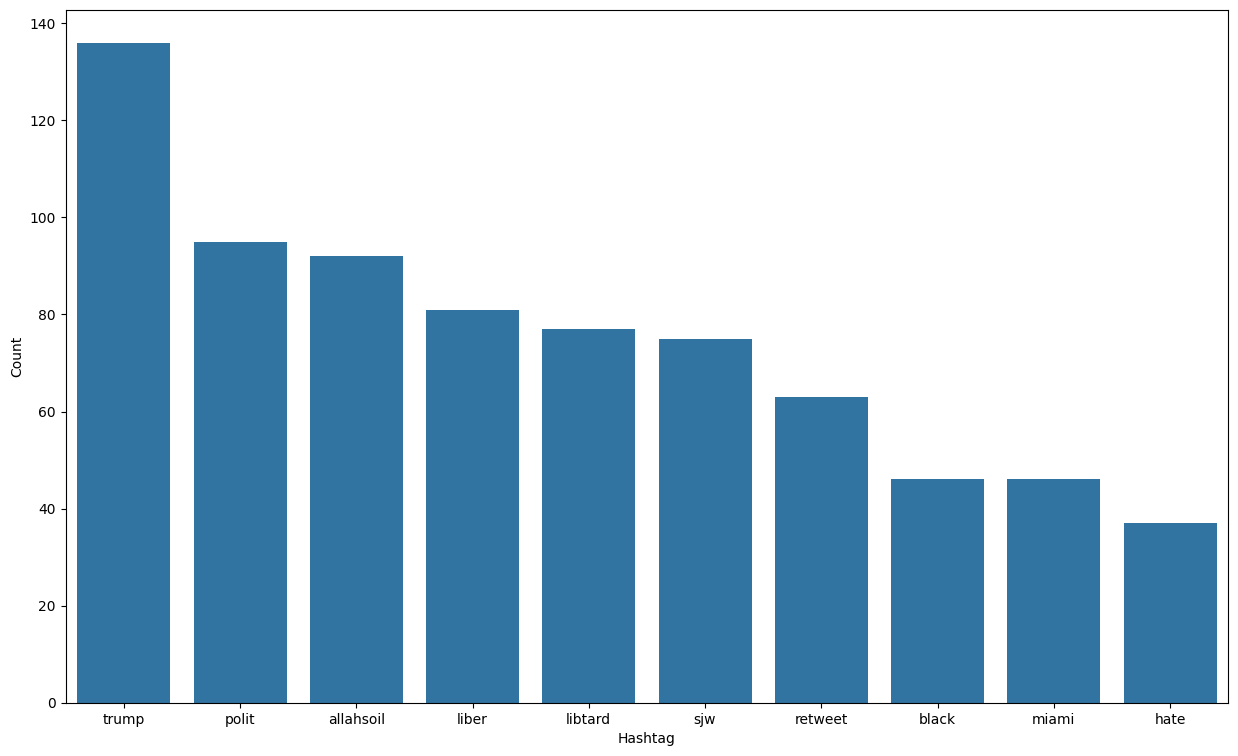

In [35]:
# Bar plot for negative tweets
freq = nltk.FreqDist(neg_tweets)
d = pd.DataFrame(
    {
        'Hashtag': list(freq.keys()),
        'Count': list(freq.values())
    }
)

d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y="Count")
plt.show()

# Model Implementation
# 1. Traditional ML model

## Handle Class Imbalance & Splitting

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [37]:
X = df['clean_tweets']
y = df['label']

vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42, stratify=y)

smote = SMOTE(sampling_strategy=0.5, random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [38]:
# Convert tokens to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweets'])

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42, stratify=y)

## Model Training

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_balanced, y_train_balanced)

LogisticRegression()

# **Model Evaluation**

In [40]:
# Testing
from sklearn.metrics import accuracy_score, f1_score
y_pred = model.predict(x_test)
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("F1 score: {}".format(f1_score(y_test, y_pred)))

Accuracy score: 0.938681016143161
F1 score: 0.631578947368421


In [41]:
# Save model
import pickle
pickle.dump(model, open("traditional_model.pkl", "wb"))

# Deep Learning Model

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix

In [43]:
# Tokenization for Deep Learning Model
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_tweets'])

x_train_seq = tokenizer.texts_to_sequences(df['clean_tweets'])
x_train_pad = pad_sequences(x_train_seq, maxlen=50)

x_train_dl, x_test_dl, y_train_dl, y_test_dl = train_test_split(x_train_pad, y, test_size=0.25, random_state=42, stratify=y)

In [39]:
model_dl = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

# Compile Model
model_dl.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

model_dl.fit(x_train_dl, y_train_dl, epochs=10, batch_size=32, validation_data=(x_test_dl, y_test_dl))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9332 - loss: 0.2018 - val_accuracy: 0.7617 - val_loss: 0.4377
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9757 - loss: 0.0724 - val_accuracy: 0.5997 - val_loss: 0.9167
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9815 - loss: 0.0547 - val_accuracy: 0.9586 - val_loss: 0.1434
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9884 - loss: 0.0347 - val_accuracy: 0.9512 - val_loss: 0.1711
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9919 - loss: 0.0233 - val_accuracy: 0.9502 - val_loss: 0.1853
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9954 - loss: 0.0146 - val_accuracy: 0.9558 - val_loss: 0.2213
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9963 - loss: 0.0111 - val_accuracy: 0.9572 - val_loss: 0.2437
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9972 - loss: 0.0094 - val_

In [76]:
model_dl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 128)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,464,197 (9.40 MB)

 Trainable params: 821,313 (3.13 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 1,642,628 (6.27 MB)

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


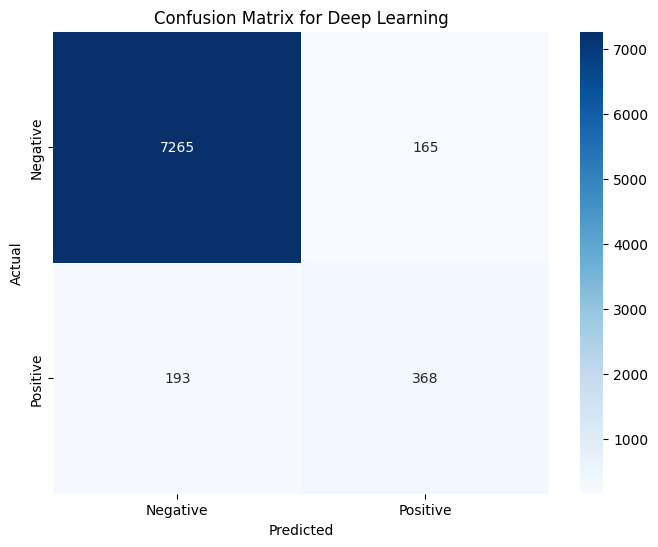

In [40]:
# Predictions
y_pred_dl = model_dl.predict(x_test_dl)
y_pred_dl = (y_pred_dl > 0.3)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Deep Learning')
plt.show()

# **Model Evaluation**

In [78]:
# Evalute the metrices, recall, fi_score and precision
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Using y_test_dl
print("Accuracy score: {}".format(accuracy_score(y_test_dl, y_pred_dl)))
print("F1 score: {}".format(f1_score(y_test_dl, y_pred_dl)))
print("Precision score: {}".format(precision_score(y_test_dl, y_pred_dl)))
print("Recall score: {}".format(recall_score(y_test_dl, y_pred_dl)))

Accuracy score: 0.9551995995494932
F1 score: 0.6727605118829981
Precision score: 0.6904315196998124
Recall score: 0.6559714795008913


# **Predicting Words to check the sentiments**

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

def clean_text(text):
    """Applies the same preprocessing steps used for training to the input text."""
    # Removing user handles
    text = remove_pattern(text, "@[\w]*")
    # Removing special chars, punctuations & numbers
    text = re.sub("[^a-zA-Z#]", " ", text)
    # Removing short words
    text = ' '.join([w for w in text.split() if len(w) > 3])
    # Stemming
    stemmer = PorterStemmer() # Initialize PorterStemmer inside the function
    text = " ".join([stemmer.stem(word) for word in text.split()])
    return text

def predict_sentiment(text):
    cleaned_text = clean_text(text) # Call the clean_text function
    text_tfidf = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_tfidf)
    return "negative" if prediction[0] == 1 else "positive"

while True:
    user_input = input("Enter a text for sentiment prediction (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    predicted_sentiment = predict_sentiment(user_input)
    print(f"The sentiment of the text '{user_input}' is: {predicted_sentiment}")

Enter a text for sentiment prediction (or type 'exit' to quit): love
The sentiment of the text 'love' is: positive
Enter a text for sentiment prediction (or type 'exit' to quit): sad
The sentiment of the text 'sad' is: negative
Enter a text for sentiment prediction (or type 'exit' to quit): happy
The sentiment of the text 'happy' is: positive
Enter a text for sentiment prediction (or type 'exit' to quit): feelings
The sentiment of the text 'feelings' is: positive
Enter a text for sentiment prediction (or type 'exit' to quit): like
The sentiment of the text 'like' is: positive
Enter a text for sentiment prediction (or type 'exit' to quit): laugh
The sentiment of the text 'laugh' is: positive
Enter a text for sentiment prediction (or type 'exit' to quit): trump
The sentiment of the text 'trump' is: negative


In [44]:
# Save model
model_dl.save('deep_learning_model.h5')

# **Fine-tuning Deep Learning Model using different hyparameters**

In [44]:
# Fine-Tuned Model
from tensorflow.keras.optimizers import RMSprop
model_dl = Sequential([
    Embedding(input_dim=10000, output_dim=256, input_length=50),
    LSTM(256, return_sequences=True, recurrent_dropout=0.3),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(128, return_sequences=False, recurrent_dropout=0.3),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile Model
model_dl.compile(loss='binary_crossentropy',
                 optimizer=RMSprop(learning_rate=0.0003),
                 metrics=['accuracy'])

# Train Model
model_dl.fit(x_train_dl, y_train_dl, epochs=15, batch_size=64, validation_data=(x_test_dl, y_test_dl))

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


375/375 ━━━━━━━━━━━━━━━━━━━━ 367s 953ms/step - accuracy: 0.9226 - loss: 0.2673 - val_accuracy: 0.9388 - val_loss: 0.1839
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 347s 926ms/step - accuracy: 0.9540 - loss: 0.1309 - val_accuracy: 0.9542 - val_loss: 0.1384
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 379s 918ms/step - accuracy: 0.9618 - loss: 0.1168 - val_accuracy: 0.9577 - val_loss: 0.1391
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 379s 910ms/step - accuracy: 0.9661 - loss: 0.1026 - val_accuracy: 0.9601 - val_loss: 0.1372
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 383s 911ms/step - accuracy: 0.9711 - loss: 0.0895 - val_accuracy: 0.9504 - val_loss: 0.1434
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 382s 915ms/step - accuracy: 0.9745 - loss: 0.0858 - val_accuracy: 0.9602 - val_loss: 0.1312
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 382s 914ms/step - accuracy: 0.9772 - loss: 0.0770 - val_accuracy: 0.9607 - val_loss: 0.1430
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 380s 909ms/step - accuracy: 0.9791 - loss: 0.07

# **Model Summary**

In [46]:
model_dl.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 256)             │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 50, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,583,044 (25.11 MB)

 Trainable params: 3,291,265 (12.56 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 3,291,267 (12.56 MB)

# **Confusion Matrix**

250/250 ━━━━━━━━━━━━━━━━━━━━ 44s 170ms/step


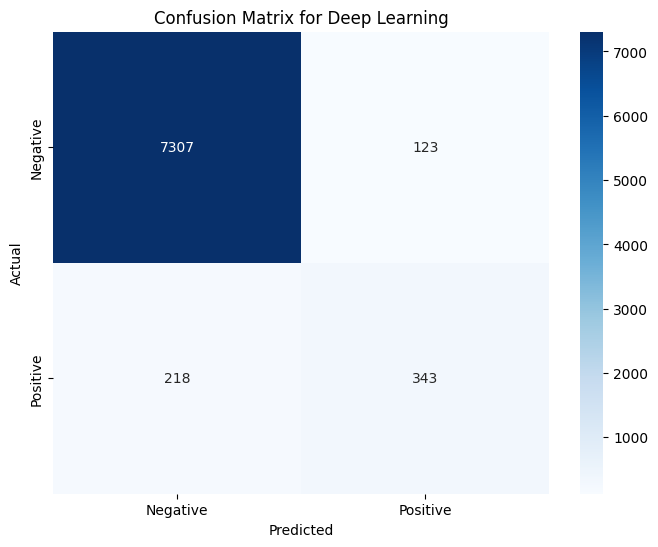

In [48]:
# The confusion matrix

from sklearn.metrics import confusion_matrix

y_pred_dl = model_dl.predict(x_test_dl)
y_pred_dl = (y_pred_dl > 0.3)

cm = confusion_matrix(y_test_dl, y_pred_dl)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Deep Learning')
plt.show()

# **Model Evaluation**

In [50]:
# Evaluting the metrices, recall, fi_score and precision

from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Using y_test_dl
print("Accuracy score: {}".format(accuracy_score(y_test_dl, y_pred_dl)))
print("F1 score: {}".format(f1_score(y_test_dl, y_pred_dl)))
print("Precision score: {}".format(precision_score(y_test_dl, y_pred_dl)))
print("Recall score: {}".format(recall_score(y_test_dl, y_pred_dl)))




Accuracy score: 0.9573269928669753
F1 score: 0.667964946445959
Precision score: 0.7360515021459227
Recall score: 0.6114081996434938


In [52]:
model_dl.save('fine_tuned_model.h5')

## Transformer Model (BERT)

In [52]:
from transformers import TFBertForSequenceClassification, BertTokenizer
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split testing and training data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Ensure y_train has the same length as df_train
y_train = df_train['label']
y_test = df_test['label']

bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

inputs = tokenizer(df_train['clean_tweets'].tolist(), return_tensors="tf", padding=True, truncation=True, max_length=100)

# Use y_train when creating the dataset
dataset = tf.data.Dataset.from_tensor_slices((dict(inputs), y_train)).batch(32)

bert_model.compile(optimizer='adam',
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

bert_model.fit(dataset, epochs=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
800/800 [==============================] - 296s 317ms/step - loss: 0.2677 - accuracy: 0.9294
Epoch 2/3
800/800 [==============================] - 246s 307ms/step - loss: 0.2663 - accuracy: 0.9301
Epoch 3/3
800/800 [==============================] - 245s 307ms/step - loss: 0.2655 - accuracy: 0.9301


In [54]:
# Assuming `X_test` contains test texts and `y_test` contains labels

# y_train = df_train['label']
X_test = df_test['clean_tweets'][y_test.index]

inputs_test = tokenizer(X_test.tolist(), return_tensors="tf", padding=True, truncation=True, max_length=100)

# Convert to TensorFlow dataset
test_dataset = tf.data.Dataset.from_tensor_slices((dict(inputs_test), y_test)).batch(32)

# Evaluate the model
results = bert_model.evaluate(test_dataset)
print(f"Loss: {results[0]}, Accuracy: {results[1]}")


200/200 [==============================] - 25s 110ms/step - loss: 0.2593 - accuracy: 0.9287
Loss: 0.2592974305152893, Accuracy: 0.9286719560623169


In [55]:
y_pred_logits = bert_model.predict(test_dataset).logits
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()  # Convert logits to label indices

200/200 [==============================] - 25s 109ms/step


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Positive", "Negative"]))

              precision    recall  f1-score   support

    Positive       0.93      1.00      0.96      5937
    Negative       0.00      0.00      0.00       456

    accuracy                           0.93      6393
   macro avg       0.46      0.50      0.48      6393
weighted avg       0.86      0.93      0.89      6393



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Evaluation


In [66]:
x_test_dense = x_test.toarray()

loss, accuracy = bert_model.evaluate(test_dataset)
print("Loss:", loss)
print("Accuracy:", accuracy)

200/200 [==============================] - 23s 115ms/step - loss: 0.2593 - accuracy: 0.9287
Loss: 0.2592974305152893
Accuracy: 0.9286719560623169


In [72]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("F1 score: {}".format(f1))
print("Precision score: {}".format(precision))
print("Recall score: {}".format(recall))

F1 score: 0.0
Precision score: 0.0
Recall score: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
